# Task - A

In [9]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from PIL import Image
import os
import matplotlib.pyplot as plt

# Load a pre-trained model for object detection
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [5]:

# Initialize dictionary to store object frequencies
object_freq = {}

# Load images from the Hateful Memes Dataset
c = 0
image_folder = "/Users/hemu/Downloads/IIITH_PreCog_Recruitment/hateful_memes/img"
for filename in os.listdir(image_folder):
    if filename.endswith(".png"): 
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path).convert("RGB")
        img_tensor = torchvision.transforms.functional.to_tensor(img)
        img_tensor = img_tensor.unsqueeze(0)

        # Detecting objects
        with torch.no_grad():
            prediction = model(img_tensor)

        # Get class IDs of detected objects
        class_ids = [int(i) for i in prediction[0]['labels']]
        c+=1
        print(c)
        # Update object frequencies
        _ = 0
        for class_id in class_ids:
            object_freq[class_id] = object_freq.get(class_id, 0) + 1
            _ += 1
            print(c,".",_)



1
1 . 1
1 . 2
1 . 3
1 . 4
1 . 5
1 . 6
1 . 7
1 . 8
1 . 9
1 . 10
1 . 11
1 . 12
1 . 13
1 . 14
1 . 15
1 . 16
1 . 17
1 . 18
1 . 19
1 . 20
1 . 21
1 . 22
1 . 23
1 . 24
1 . 25
1 . 26
1 . 27
1 . 28
1 . 29
1 . 30
1 . 31
1 . 32
1 . 33
1 . 34
1 . 35
1 . 36
1 . 37
2
2 . 1
2 . 2
2 . 3
2 . 4
2 . 5
2 . 6
2 . 7
2 . 8
2 . 9
2 . 10
2 . 11
2 . 12
2 . 13
2 . 14
3
3 . 1
3 . 2
3 . 3
3 . 4
3 . 5
3 . 6
3 . 7
3 . 8
3 . 9
3 . 10
3 . 11
3 . 12
3 . 13
3 . 14
3 . 15
3 . 16
3 . 17
3 . 18
3 . 19
3 . 20
3 . 21
3 . 22
3 . 23
3 . 24
3 . 25
3 . 26
3 . 27
3 . 28
3 . 29
3 . 30
3 . 31
3 . 32
3 . 33
3 . 34
3 . 35
3 . 36
3 . 37
3 . 38
3 . 39
3 . 40
3 . 41
3 . 42
3 . 43
3 . 44
3 . 45
3 . 46
3 . 47
3 . 48
3 . 49
3 . 50
3 . 51
3 . 52
3 . 53
3 . 54
3 . 55
3 . 56
3 . 57
3 . 58
3 . 59
3 . 60
3 . 61
3 . 62
3 . 63
3 . 64
3 . 65
3 . 66
3 . 67
3 . 68
3 . 69
3 . 70
3 . 71
3 . 72
3 . 73
4
4 . 1
4 . 2
4 . 3
4 . 4
4 . 5
4 . 6
4 . 7
4 . 8
4 . 9
4 . 10
4 . 11
4 . 12
4 . 13
4 . 14
4 . 15
4 . 16
4 . 17
4 . 18
4 . 19
4 . 20
4 . 21
4 . 22
4 . 23

In [10]:
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

object_frequency = {}

for class_id, freq in object_freq.items():
    class_name = COCO_INSTANCE_CATEGORY_NAMES[class_id]
    object_frequency[class_name] = freq
    # print(f"Object Class ID: {class_name}, Frequency: {freq}")

In [14]:
for class_id, freq in object_frequency.items():
    print(f"Object Class ID: {class_id}, Frequency: {freq}")

Object Class ID: person, Frequency: 115220
Object Class ID: car, Frequency: 5946
Object Class ID: tie, Frequency: 14713
Object Class ID: chair, Frequency: 13337
Object Class ID: bus, Frequency: 731
Object Class ID: truck, Frequency: 1655
Object Class ID: umbrella, Frequency: 3315
Object Class ID: book, Frequency: 5976
Object Class ID: dog, Frequency: 3666
Object Class ID: donut, Frequency: 2190
Object Class ID: teddy bear, Frequency: 1941
Object Class ID: cat, Frequency: 1446
Object Class ID: apple, Frequency: 943
Object Class ID: baseball bat, Frequency: 1455
Object Class ID: baseball glove, Frequency: 1149
Object Class ID: sheep, Frequency: 3562
Object Class ID: zebra, Frequency: 261
Object Class ID: horse, Frequency: 2594
Object Class ID: backpack, Frequency: 5204
Object Class ID: tennis racket, Frequency: 624
Object Class ID: dining table, Frequency: 5869
Object Class ID: parking meter, Frequency: 421
Object Class ID: cup, Frequency: 3639
Object Class ID: traffic light, Frequency: 

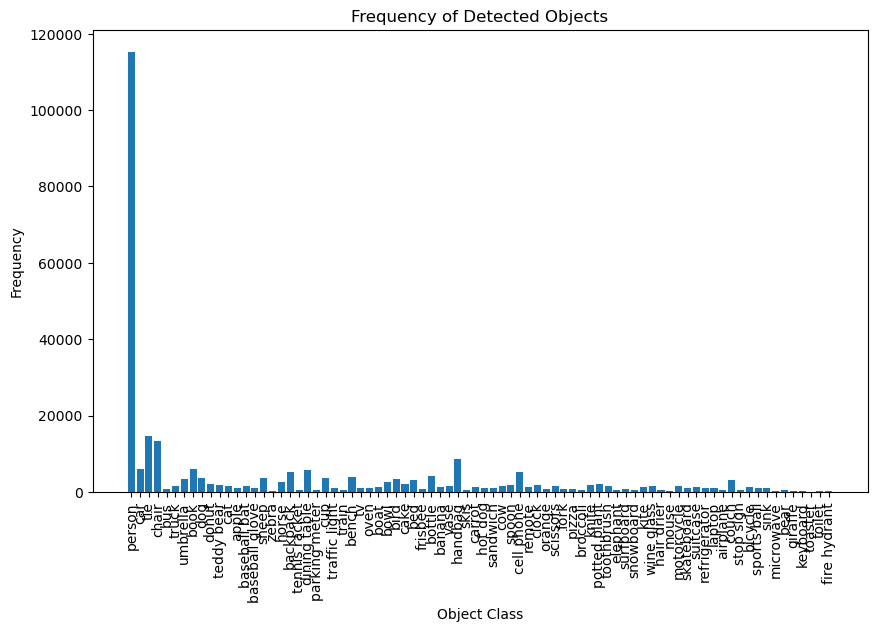

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(object_frequency.keys(), object_frequency.values())
plt.xlabel('Object Class')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Frequency of Detected Objects')
plt.show()